In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.htfa as HTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
new_pieman = niidb.FMriActivationsDb('data/new_pieman.db',
                                     mask='/home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz')

In [5]:
htfa = HTFA.HierarchicalTopographicFactorAnalysis(list(new_pieman.all()), mask='/home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz', num_factors=100)

06/22/2018 09:53:24 Loading Nifti image /home/eli/Documents/new_pieman/all_tasks/sub-19-task-intact2.nii with mask /home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz (zscore=True)
06/22/2018 09:53:26 Loading Nifti image /home/eli/Documents/new_pieman/all_tasks/sub-70-task-rest1.nii with mask /home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz (zscore=True)
06/22/2018 09:53:29 Loading Nifti image /home/eli/Documents/new_pieman/all_tasks/sub-72-task-rest1.nii with mask /home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz (zscore=True)
06/22/2018 09:53:32 Loading Nifti image /home/eli/Documents/new_pieman/all_tasks/sub-39-task-word.nii with mask /home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz (zscore=True)
06/22/2018 09:53:35 Loading Nifti image /home/eli/Documents/new_pieman/all_tasks/sub-45-task-word.nii with mask /home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz (zscore=True)
06/22/2018 09:53:37 Loading Nifti image /home/eli/Documents/new_pieman

In [6]:
htfa.load_state('data/pieman_k100_n700_06212018_171011')

In [9]:
import torch

guide_state = torch.load('data/pieman_k100_n700_06212018_171011.htfa_guide')
htfa.enc.hyperparams.block__weights__mu.data = guide_state['hyperparams.block__weights__mu']
htfa.enc.hyperparams.block__weights__sigma.data = guide_state['hyperparams.block__weights__sigma']

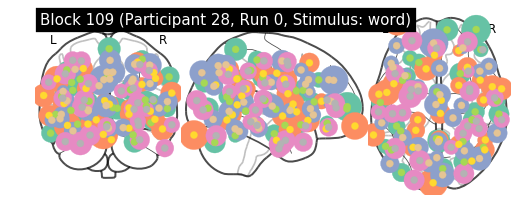

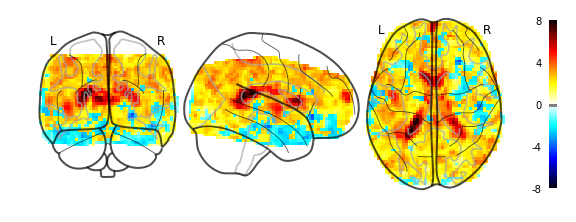

06/22/2018 10:01:45 Reconstruction Error (Frobenius Norm): 3.32656616e+03 out of 4.28307178e+03


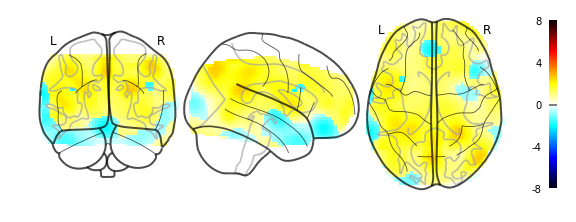

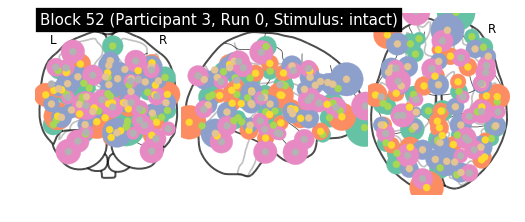

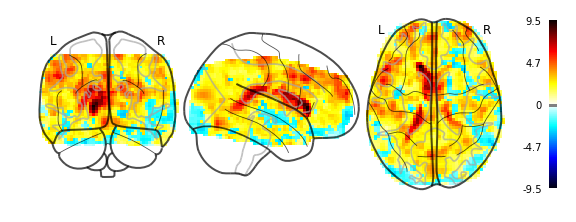

06/22/2018 10:02:16 Reconstruction Error (Frobenius Norm): 3.33307715e+03 out of 4.28308057e+03


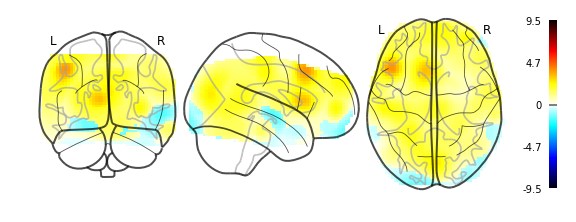

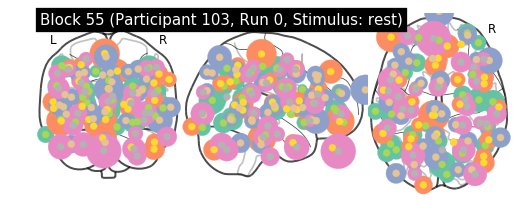

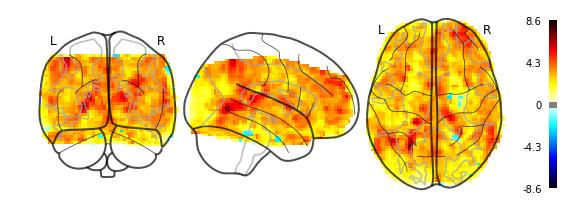

06/22/2018 10:02:57 Reconstruction Error (Frobenius Norm): 4.15717383e+03 out of 4.94738770e+03


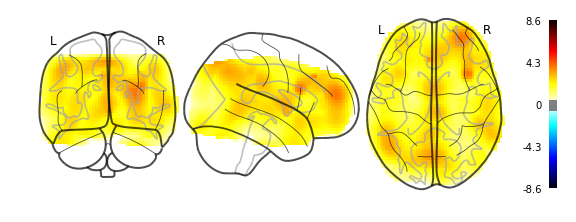

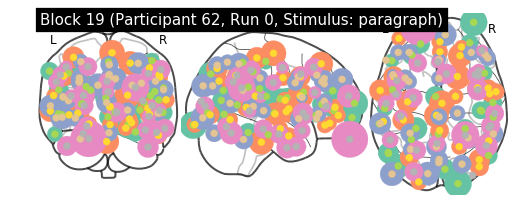

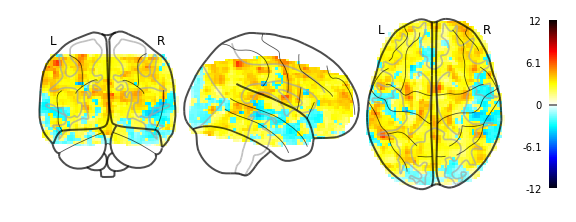

06/22/2018 10:03:28 Reconstruction Error (Frobenius Norm): 3.40295483e+03 out of 4.28307812e+03


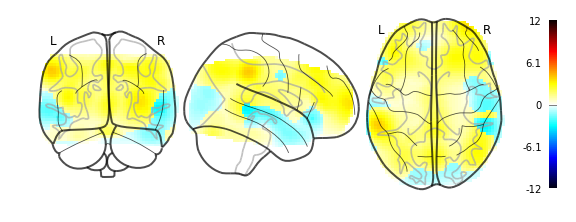

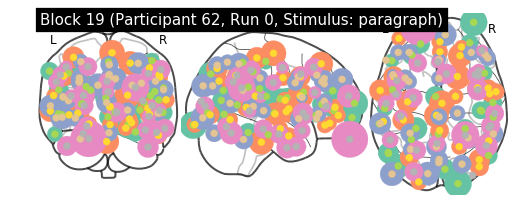

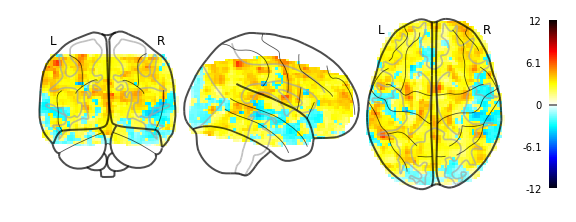

06/22/2018 10:03:59 Reconstruction Error (Frobenius Norm): 3.40295483e+03 out of 4.28307812e+03


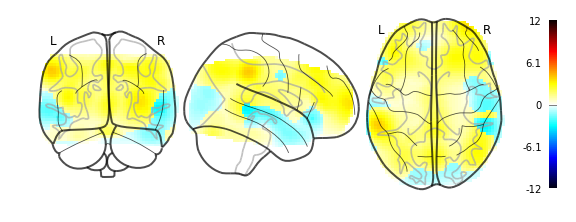

In [10]:
for b in np.random.choice(range(htfa.num_blocks), 5):
    htfa.plot_factor_centers(b)
    htfa.plot_original_brain(b)
    htfa.plot_reconstruction(b)

In [11]:
def task_labeler(b):
    return b.task

def rest_task_labeler(b):
    if b.task == 'rest':
        return 'Rest'
    else:
        return 'Task'

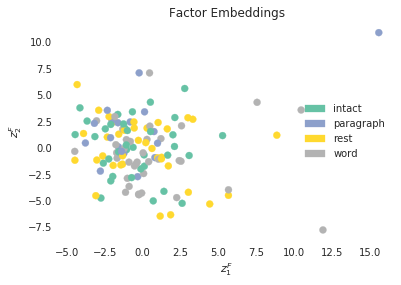

In [12]:
#factor 'embeddings' with PCA
htfa.scatter_factor_embedding(labeler=task_labeler,embedding='PCA')

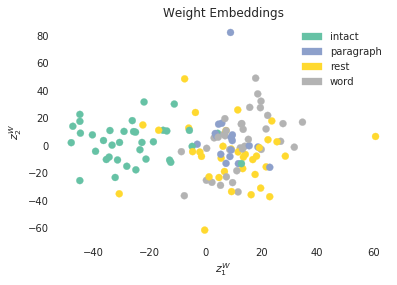

In [13]:
#weight 'embeddings' with PCA
htfa.scatter_weight_embedding(labeler=task_labeler,embedding='PCA')

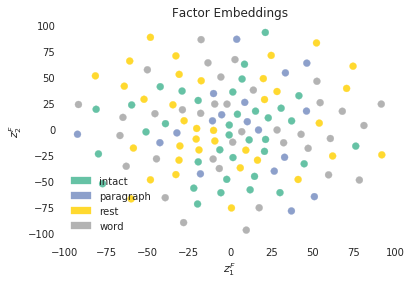

In [14]:
#factor 'embeddings' with TSNE
htfa.scatter_factor_embedding(labeler=task_labeler,embedding='TSNE')

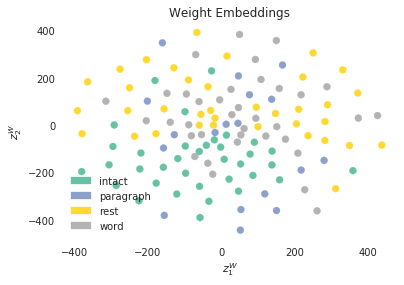

In [15]:
#weight 'embeddings' with TSNE
htfa.scatter_weight_embedding(labeler=task_labeler,embedding='TSNE')

In [16]:
htfa.decoding_accuracy()

intact


/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:363: RuntimeWarning: divide by zero encountered in log
  return 0.5 * (np.log(1 + r) - np.log(1 - r))
/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:394: RuntimeWarning: invalid value encountered in add
  isfc_mat[n, :] = isfc_mat[n, :] + vectorize(next_corrs + next_corrs.T)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


paragraph


/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:366: RuntimeWarning: invalid value encountered in true_divide
  return (np.exp(2 * z) - 1) / (np.exp(2 * z) + 1)


rest
word


{'intact': {'isfc': [array([0.        , 0.        , 0.00252525, 0.        , 0.00252525,
          0.        , 0.00252525, 0.        , 0.00252525])],
  'kl': [array([0.02525253, 0.03030303, 0.02020202, 0.01767677, 0.02020202,
          0.02020202, 0.01262626, 0.01010101, 0.01262626])],
  'mixed': [array([0.        , 0.        , 0.00252525, 0.        , 0.00252525,
          0.        , 0.00252525, 0.        , 0.00252525])],
  'node': [array([0.05808081, 0.08080808, 0.0479798 , 0.06565657, 0.02020202,
          0.02525253, 0.01262626, 0.02020202, 0.01010101])]},
 'paragraph': {'isfc': [array([0.        , 0.        , 0.00252525, 0.        , 0.00252525,
          0.        , 0.00252525, 0.        , 0.00252525])],
  'kl': [array([0.02525253, 0.01767677, 0.01767677, 0.01767677, 0.01262626,
          0.01767677, 0.00757576, 0.01767677, 0.00757576])],
  'mixed': [array([0.        , 0.        , 0.00252525, 0.        , 0.00252525,
          0.        , 0.00252525, 0.        , 0.00252525])],
  'no

In [17]:
htfa.voxel_decoding_accuracy()

intact
paragraph
rest
word


{'intact': [array([0.16216216, 0.28040541, 0.06418919, 0.15202703, 0.02027027,
         0.05743243, 0.01689189, 0.02027027, 0.00675676])],
 'paragraph': [array([0.07432432, 0.13513514, 0.03378378, 0.09121622, 0.02364865,
         0.06081081, 0.00337838, 0.02364865, 0.00337838])],
 'rest': [array([0.01515152, 0.00757576, 0.01262626, 0.00252525, 0.00757576,
         0.00252525, 0.01010101, 0.00505051, 0.00505051])],
 'word': [array([0.08783784, 0.0777027 , 0.06418919, 0.04391892, 0.02364865,
         0.02364865, 0.01013514, 0.01689189, 0.01351351])]}